### End of Distribution imputation
#### Aim - Here Nan values are replaced with extreme end values of distribution. Usually applicable for MNAR(Missing Not at Random)

In [3]:
import pandas as pd

In [28]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


<AxesSubplot:>

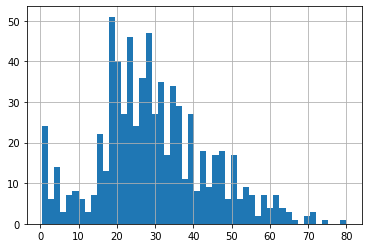

In [7]:
df.Age.hist(bins=50)

In [29]:
print(df.Age.mean())

29.69911764705882


In [30]:
extreme=df.Age.mean()+(3*df.Age.std())
extreme

73.27860964406094

c:\users\riary\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

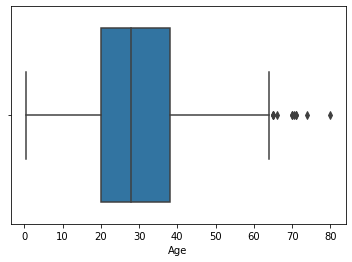

In [31]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [32]:
def impute_nan(df,variable,median,extreme):
    
    #create new column with Age's nan value replacved with extreme
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    
    #also replacing Nan value from original Age column to compare further
    df[variable].fillna(median,inplace=True)

In [33]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [34]:
df.head(6)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861


#### Let's plot the histogram of Mean-Median Imputated data & End of Distribution Imputation

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'End of Distribution imputation')

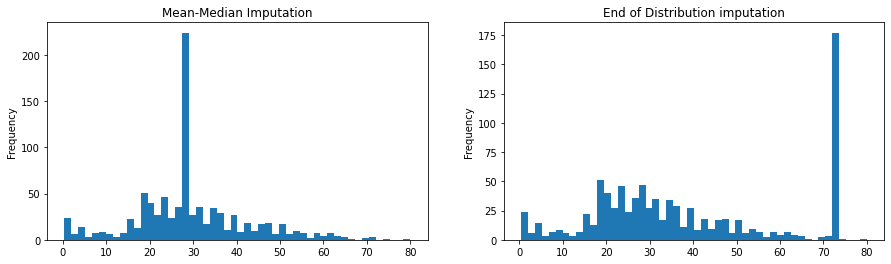

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df['Age'].plot(kind='hist',bins=50,ax=ax1)
df['Age_end_distribution'].plot(kind='hist',bins=50,ax=ax2)
ax1.set_title("Mean-Median Imputation")
ax2.set_title("End of Distribution imputation")

#### We can observe that while using Mean-Median Imputation there is alot of distortion in the data on the other hand by End of Distribution outlier is also handled

c:\users\riary\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

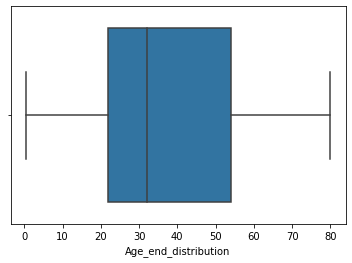

In [39]:
sns.boxplot('Age_end_distribution',data=df)

#### Above diagram shows there is no outliers present.